<a href="https://colab.research.google.com/github/homerabbitsky/HelloAI/blob/main/Theano2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!cat ~/.keras/keras.json
!git clone "https://github.com/kartoone/nn3"
!cat nn3/keras.json > ~/.keras/keras.json
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow==2.2
!pip install keras==2.2.4
!pip install pydot-ng
!pip install theano==0.8
%cd nn3/src


Cloning into 'nn3'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 188 (delta 42), reused 29 (delta 12), pack-reused 109
Receiving objects: 100% (188/188), 94.38 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (108/108), done.
Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 KB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75

In [ ]:
!cat ~/.keras/keras.json


{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "theano",
    "image_dim_ordering": "th",
    "image_data_format": "channels_first"
}


In [ ]:
%cd nn3/src

import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10
net = Network([
        FullyConnectedLayer(n_in=784, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 60, mini_batch_size, 0.1, 
            validation_data, test_data)


[Errno 2] No such file or directory: 'nn3/src'
/content/nn3/src
Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 0.9253000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9207000000000002
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 0.9467000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9436000000000001
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 0.9584000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9536000000000001
Training mini-batch number 15000
Training mini-batch number 16000
Training

In [ ]:
import numpy as np

# assumes batch size of 10
def findTroublesomeImage(net, test_data, batchsize=10):
  batches = int(len(test_data[1].eval())/batchsize)
  print(batches)
  worsta = 1.0
  worsti = 0
  for i in range(batches):
    outputs = net.test_mb_outputs(i)
    for a in outputs:
      if np.max(a)<worsta:
        worsta = np.max(a)
        worsti = i
  return (worsti, worsta)

1000
170
0.2988699
2
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 19, 39, 28, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 190, 207, 146, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 198, 252, 161, 247, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 102, 253, 253, 253, 244, 193, 35, 5, 39, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 46, 224, 253, 253, 253, 253, 215, 152, 253, 218, 138, 72, 0, 0, 0, 0, 

array([[4.39680437e-14, 9.99985278e-01, 1.39406339e-07, 1.54249983e-06,
        5.49200649e-07, 8.92306502e-07, 6.79408686e-07, 1.17282082e-06,
        9.72172347e-06, 3.91708799e-09],
       [5.62648615e-14, 9.99672830e-01, 3.01405798e-08, 7.49568653e-06,
        2.03889741e-07, 8.40256362e-08, 7.78001834e-07, 6.11664564e-06,
        3.12009040e-04, 4.35986834e-07],
       [1.86319254e-15, 1.51051237e-11, 2.79596072e-14, 1.11993685e-10,
        9.99999940e-01, 1.70915071e-09, 5.71029639e-12, 3.56250029e-10,
        1.25378963e-09, 6.39979305e-08],
       [2.71970606e-08, 3.99346281e-05, 9.15258169e-01, 6.04606932e-03,
        7.85799846e-02, 2.44728511e-07, 4.50197622e-05, 6.08526785e-09,
        3.03579527e-05, 2.05887986e-07],
       [1.94683584e-13, 6.24188201e-11, 6.06522319e-13, 1.21527091e-08,
        5.33122184e-05, 1.32223343e-10, 5.38818946e-12, 6.82835677e-10,
        1.09107781e-07, 9.99946594e-01],
       [4.77961551e-12, 1.94295104e-08, 6.17293661e-10, 1.67620374e-06,
   

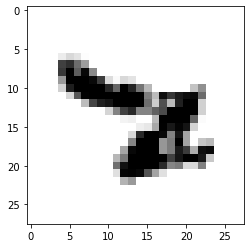

In [ ]:
import matplotlib.pyplot as plt

(worsti, worsta) = findTroublesomeImage(net, test_data)
print(worsti)
print(worsta)

print(test_data[1][4176].eval())
pixeldata = test_data[0][4176].reshape((28,28)).eval()
pixeldata = [[round(p*255) for p in pix] for pix in pixeldata]
print(pixeldata)
plt.figure()
plt.imshow(pixeldata, cmap="gray_r")
net.test_mb_outputs(417)


In [ ]:
!pip show theano

Name: Theano
Version: 0.8.0
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, scipy, six
Required-by: 
